# L3v4 : Projectile Motion

### **Step-by-Step Algorithm for Analyzing Projectile Motion**

---

#### **Step 1: Define the Coordinate System**
1. **Axes:**  
   - $+x$: Horizontal direction (typically along the ground).  
   - $+y$: Vertical direction (upward, opposite to gravity).  
2. **Origin ($x_0, y_0$):**  
   - Usually $(0, 0)$ if the projectile is launched from ground level.

---

#### **Step 2: Identify Initial Conditions**
1. **Initial Velocity ($\vec{v}_0$):**  
   - $v_{x0} = v_0 \cos \theta$ (horizontal component).  
   - $v_{y0} = v_0 \sin \theta$ (vertical component).  
2. **Initial Position:**  
   - $x_0 = 0$, $y_0 = 0$ (if launched from origin).  

---

#### **Step 3: Apply Newton’s Second Law**
1. **Horizontal Motion ($x$-axis):**  
   - No acceleration ($a_x = 0$).  
   - **Velocity:** $v_x(t) = v_{x0}$ (constant).  
   - **Position:** $x(t) = x_0 + v_{x0} t$.  

2. **Vertical Motion ($y$-axis):**  
   - Acceleration due to gravity ($a_y = -g$, where $g = 9.8 \, \text{m/s}^2$).  
   - **Velocity:** $v_y(t) = v_{y0} - g t$.  
   - **Position:** $y(t) = y_0 + v_{y0} t - \frac{1}{2} g t^2$.  

---

#### **Step 4: Eliminate Time to Find Trajectory**
1. Solve $x(t) = v_{x0} t$ for $t$:  
   $$
   t = \frac{x}{v_{x0}}.
   $$  
2. Substitute $t$ into $y(t)$:  
   $$
   y(x) = y_0 + \left( \frac{v_{y0}}{v_{x0}} \right) x - \frac{g}{2 v_{x0}^2} x^2.
   $$  
   - **Note:** This is a **parabolic** equation $y(x)$.  

---

#### **Step 5: Key Results**
1. **Time of Flight ($T$):**  
   - Solve $y(T) = 0$ (when projectile lands):  
     $$
     T = \frac{2 v_{y0}}{g}.
     $$  
2. **Range ($R$):**  
   - Substitute $T$ into $x(t)$:  
     $$
     R = v_{x0} T = \frac{2 v_{x0} v_{y0}}{g}.
     $$  
3. **Maximum Height ($H$):**  
   - At peak, $v_y = 0$:  
     $$
     H = y_0 + \frac{v_{y0}^2}{2g}.
     $$  

---

#### **Step 6: Graphical Representations**
1. **$y(t)$ vs. $t$:** Parabola opening downward.  
2. **$x(t)$ vs. $t$:** Straight line (constant velocity).  
3. **$y(x)$:** Parabolic trajectory (path of the projectile).  

---

#### **Step 7: Special Cases**
1. **Launch from Ground ($y_0 = 0$):**  
   - Simplify equations by setting $y_0 = 0$.  
2. **Horizontal Launch ($\theta = 0$):**  
   - $v_{y0} = 0$, so $y(t) = -\frac{1}{2} g t^2$.  

---

### **Example Calculation**
**Given:**  
- $v_0 = 20 \, \text{m/s}$, $\theta = 30^\circ$, $y_0 = 0$.  

**Steps:**  
1. $v_{x0} = 20 \cos 30^\circ = 17.32 \, \text{m/s}$.  
2. $v_{y0} = 20 \sin 30^\circ = 10 \, \text{m/s}$.  
3. **Time of Flight:**  
   $$
   T = \frac{2 \times 10}{9.8} \approx 2.04 \, \text{s}.
   $$  
4. **Range:**  
   $$
   R = 17.32 \times 2.04 \approx 35.3 \, \text{m}.
   $$  
5. **Max Height:**  
   $$
   H = \frac{10^2}{2 \times 9.8} \approx 5.1 \, \text{m}.
   $$  

---

### **Summary**
1. **Horizontal Motion:** Constant velocity ($a_x = 0$).  
2. **Vertical Motion:** Constant acceleration ($a_y = -g$).  
3. **Trajectory:** Parabola $y(x)$.  
4. **Key Parameters:** $T$, $R$, $H$.  

This algorithm systematically breaks down projectile motion into manageable steps, combining physics and calculus. For numerical problems, substitute given values into the derived equations.

![](https://github.com/book-g/only_image/blob/main/L3v4%20+%20Projectile%20Motion%20+1.jpeg?raw=true)

![](https://github.com/book-g/only_image/blob/main/L3v4%20+%20Projectile%20Motion%20+%202.jpeg?raw=true)

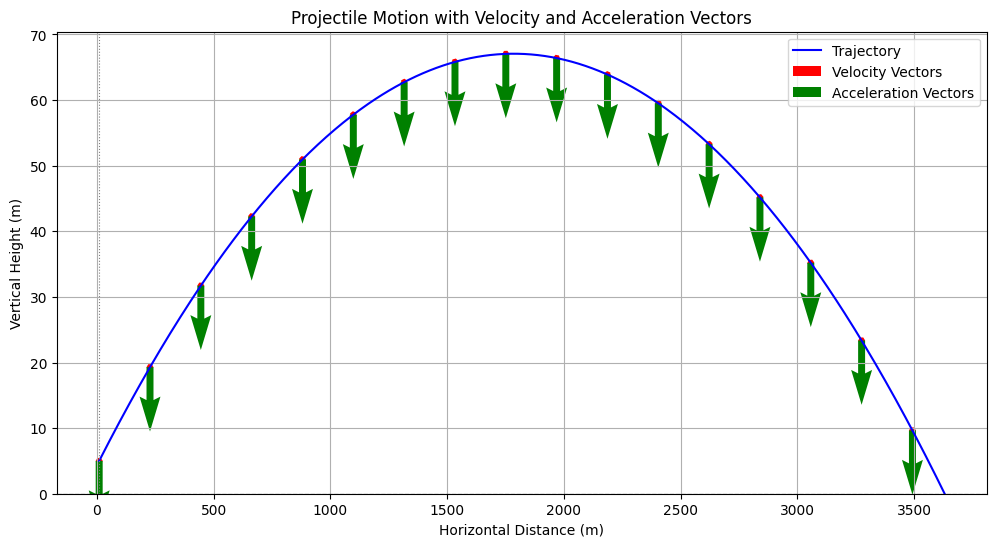

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# === USER-DEFINED INPUTS ===
v0 =    500  # Initial speed in m/s
theta_deg = 4         # Launch angle in degrees
x0, y0 = 10, 5         # Initial position (x0, y0) in meters
g = 9.8               # Acceleration due to gravity

# === CONVERSIONS ===
theta_rad = np.radians(theta_deg)
v0x = v0 * np.cos(theta_rad)  # Horizontal component
v0y = v0 * np.sin(theta_rad)  # Vertical component

# === TIME OF FLIGHT (solve quadratic: y(t) = y0 + v0y*t - 0.5*g*t^2 = 0) ===
# 0 = y0 + v0y * T - 0.5 * g * T^2
a = -0.5 * g
b = v0y
c = y0
discriminant = b**2 - 4*a*c

if discriminant < 0:
    T = 2 * v0y / g  # fallback if projectile never reaches ground
else:
    T1 = (-b + np.sqrt(discriminant)) / (2*a)
    T2 = (-b - np.sqrt(discriminant)) / (2*a)
    T = max(T1, T2)  # Only consider the positive root

# === TIME POINTS ===
t = np.linspace(0, T, num=500)

# === POSITION VECTORS ===
x = x0 + v0x * t
y = y0 + v0y * t - 0.5 * g * t**2

# === VELOCITY VECTORS ===
vx = np.full_like(t, v0x)
vy = v0y - g * t

# === ACCELERATION VECTORS (constant) ===
ax = np.zeros_like(t)
ay = -g * np.ones_like(t)

# === PLOT ===
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Trajectory", color="blue")
plt.quiver(x[::30], y[::30], vx[::30], vy[::30], color='red', angles='xy', scale_units='xy', scale=50, label='Velocity Vectors')
plt.quiver(x[::30], y[::30], ax[::30], ay[::30], color='green', angles='xy', scale_units='xy', scale=1, label='Acceleration Vectors')
plt.title("Projectile Motion with Velocity and Acceleration Vectors")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # ground line
plt.axvline(x0, color='gray', linestyle=':', linewidth=0.8)   # initial x
plt.ylim(bottom=0)
plt.legend()
plt.show()


Here's a **step-by-step explanation of the projectile motion algorithm** implemented in your code, focusing on key physics quantities: **position**, **velocity**, and **acceleration vectors**, including visualization.

---

### ✅ **ALGORITHM EXPLANATION (Step-by-Step)**

---

### **1. User Input / Initialization**

```python
v0 = 213              # Initial speed in m/s
theta_deg = 4         # Launch angle in degrees
x0, y0 = 10, 5         # Initial position (x0, y0) in meters
g = 9.8               # Acceleration due to gravity
```

* `v0`: Initial launch speed.
* `theta_deg`: Launch angle in degrees.
* `(x0, y0)`: Initial position vector of the projectile.
* `g`: Gravity constant (acts downward).

---

### **2. Convert Degrees to Radians**

```python
theta_rad = np.radians(theta_deg)
```

* Convert angle to radians since `np.cos()` and `np.sin()` require radians.

---

### **3. Decompose Initial Velocity**

```python
v0x = v0 * np.cos(theta_rad)  # Horizontal velocity
v0y = v0 * np.sin(theta_rad)  # Vertical velocity
```

* Break the velocity into horizontal and vertical components using trigonometry.

---

### **4. Compute Time of Flight**

```python
# Solve the quadratic: y(t) = y0 + v0y*t - 0.5*g*t² = 0
a = -0.5 * g
b = v0y
c = y0
discriminant = b**2 - 4*a*c
```

* We solve for `t` when the projectile hits the ground (`y = 0`).
* This is a quadratic in time (`t`) from the kinematic equation for vertical motion.

```python
if discriminant < 0:
    T = 2 * v0y / g  # fallback if no real root
else:
    T1 = (-b + np.sqrt(discriminant)) / (2*a)
    T2 = (-b - np.sqrt(discriminant)) / (2*a)
    T = max(T1, T2)  # choose the positive root
```

* We compute the roots and choose the **positive time** (when it hits the ground).
* If `discriminant < 0`, fallback to symmetric formula (approximation).

---

### **5. Time Sampling**

```python
t = np.linspace(0, T, num=500)
```

* Create 500 evenly spaced time values between 0 and total time of flight `T`.

---

### **6. Compute Position Vectors**

```python
x = x0 + v0x * t
y = y0 + v0y * t - 0.5 * g * t**2
```

* Position at each time step using:

  * $x(t) = x_0 + v_{0x} t$
  * $y(t) = y_0 + v_{0y} t - \frac{1}{2}gt^2$

---

### **7. Compute Velocity Vectors**

```python
vx = np.full_like(t, v0x)
vy = v0y - g * t
```

* Horizontal velocity `vx` remains constant.
* Vertical velocity `vy` decreases linearly due to gravity:

  * $v_y(t) = v_{0y} - g t$

---

### **8. Acceleration Vectors**

```python
ax = np.zeros_like(t)
ay = -g * np.ones_like(t)
```

* Horizontal acceleration `ax` is 0 (no air resistance).
* Vertical acceleration `ay` is constant `-g` (gravity).

---

### **9. Plot Trajectory**

```python
plt.plot(x, y, label="Trajectory", color="blue")
```

* Plot the projectile's path in 2D space.

---

### **10. Add Velocity Vectors (Quiver Plot)**

```python
plt.quiver(x[::30], y[::30], vx[::30], vy[::30], color='red', scale=50, label='Velocity Vectors')
```

* Use `quiver()` to draw arrows showing **velocity direction and magnitude** at intervals (every 30 points).
* `scale=50` adjusts the size for visibility.

---

### **11. Add Acceleration Vectors**

```python
plt.quiver(x[::30], y[::30], ax[::30], ay[::30], color='green', scale=1, label='Acceleration Vectors')
```

* Add green arrows representing **acceleration**, which always point down.
* Constant length because acceleration due to gravity is constant.

---

### **12. Final Plot Adjustments**

```python
plt.title(...)
plt.axhline(0, ...)  # Ground line
plt.axvline(x0, ...) # Initial vertical marker
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.show()
```

* Titles, labels, and formatting added for better visualization.

---

### ✅ **Summary Table**

| Step | Quantity            | Equation Used                                  | Notes                        |
| ---- | ------------------- | ---------------------------------------------- | ---------------------------- |
| 1    | Initial Inputs      | -                                              | User-defined                 |
| 2    | Angle Conversion    | $\theta \rightarrow \text{rad}$                | Needed for trig functions    |
| 3    | Velocity Components | $v_x = v_0 \cos\theta$, $v_y = v_0 \sin\theta$ | Decomposed                   |
| 4    | Time of Flight      | Solve $y(t)=0$                                 | Quadratic equation           |
| 5    | Time Steps          | $t = [0, T]$                                   | linspace                     |
| 6    | Position            | $x(t), y(t)$                                   | Vector form                  |
| 7    | Velocity            | $v_x(t), v_y(t)$                               | $v_x$ constant, $v_y$ linear |
| 8    | Acceleration        | $a_x = 0, a_y = -g$                            | Constant                     |
| 9–12 | Plotting            | matplotlib                                     | With vectors                 |

---

### 📌 Applications

* Educational animations
* Ballistics and trajectory simulations
* Physics engines in games
* Understanding real-world projectile behaviors

---

Would you like me to **add instantaneous position, displacement, average velocity** and more detailed annotations to this plot in 1D, 2D, or 3D?


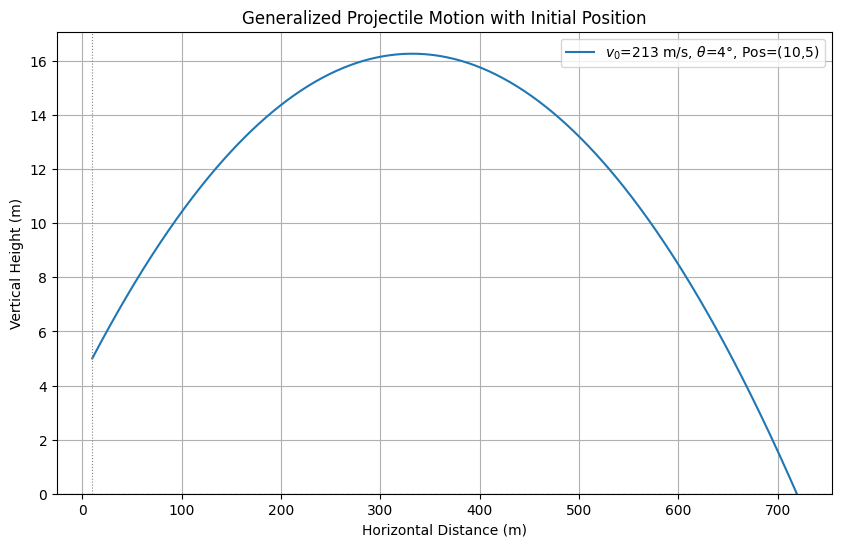

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# === USER-DEFINED INPUTS ===
v0 = 213              # Initial speed in m/s
theta_deg = 4       # Launch angle in degrees
x0, y0 = 10, 5        # Initial position (x0, y0) in meters
g = 9.8              # Acceleration due to gravity

# === CONVERSIONS ===
theta_rad = np.radians(theta_deg)
v0x = v0 * np.cos(theta_rad)  # Horizontal component
v0y = v0 * np.sin(theta_rad)  # Vertical component

# === TIME OF FLIGHT (solve quadratic: y(t) = y0 + v0y*t - 0.5*g*t^2 = 0) ===
# 0 = y0 + v0y * T - 0.5 * g * T^2
a = -0.5 * g
b = v0y
c = y0
discriminant = b**2 - 4*a*c

if discriminant < 0:
    print("No real solution: projectile never hits the ground.")
    T = 2 * v0y / g  # fallback to symmetric flight time
else:
    T1 = (-b + np.sqrt(discriminant)) / (2*a)
    T2 = (-b - np.sqrt(discriminant)) / (2*a)
    T = max(T1, T2)  # Choose the positive time

# === TIME POINTS ===
t = np.linspace(0, T, num=500)

# === POSITION FUNCTIONS ===
x = x0 + v0x * t
y = y0 + v0y * t - 0.5 * g * t**2

# === PLOT ===
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"$v_0$={v0} m/s, $\\theta$={theta_deg}°, Pos=({x0},{y0})")
plt.title("Generalized Projectile Motion with Initial Position")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # ground line
plt.axvline(x0, color='gray', linestyle=':', linewidth=0.8)   # initial x
plt.ylim(bottom=0)
plt.show()
